# 1. K-NN classifier

**Question** How does the k-nn algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [99]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [100]:
def read_data(path):
    data = pd.read_csv(path)
    data = data.drop(columns=['name'])
    data_X = data.drop(columns=['status'])
    data_Y = data['status'].tolist()
    return data_X, data_Y


data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [101]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


Number of attributes: 22
Summary statistics of the attributes:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.00068

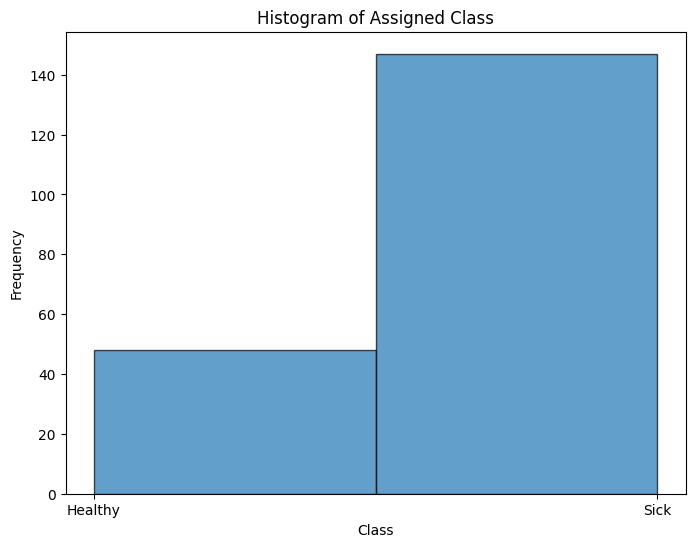

In [103]:

num_attributes = data_X.shape[1]
print(f"Number of attributes: {num_attributes}")

print("Summary statistics of the attributes:")
print(data_X.describe())

class_distribution = pd.Series(data_Y).value_counts()
print("Class distribution:")
print(class_distribution)

plt.figure(figsize=(8, 6))
plt.hist(data_Y, bins=2, edgecolor='k', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Assigned Class')
plt.xticks([0, 1], ['Healthy', 'Sick'])
plt.show()

Plot the histograms of the first 5 attributes. 

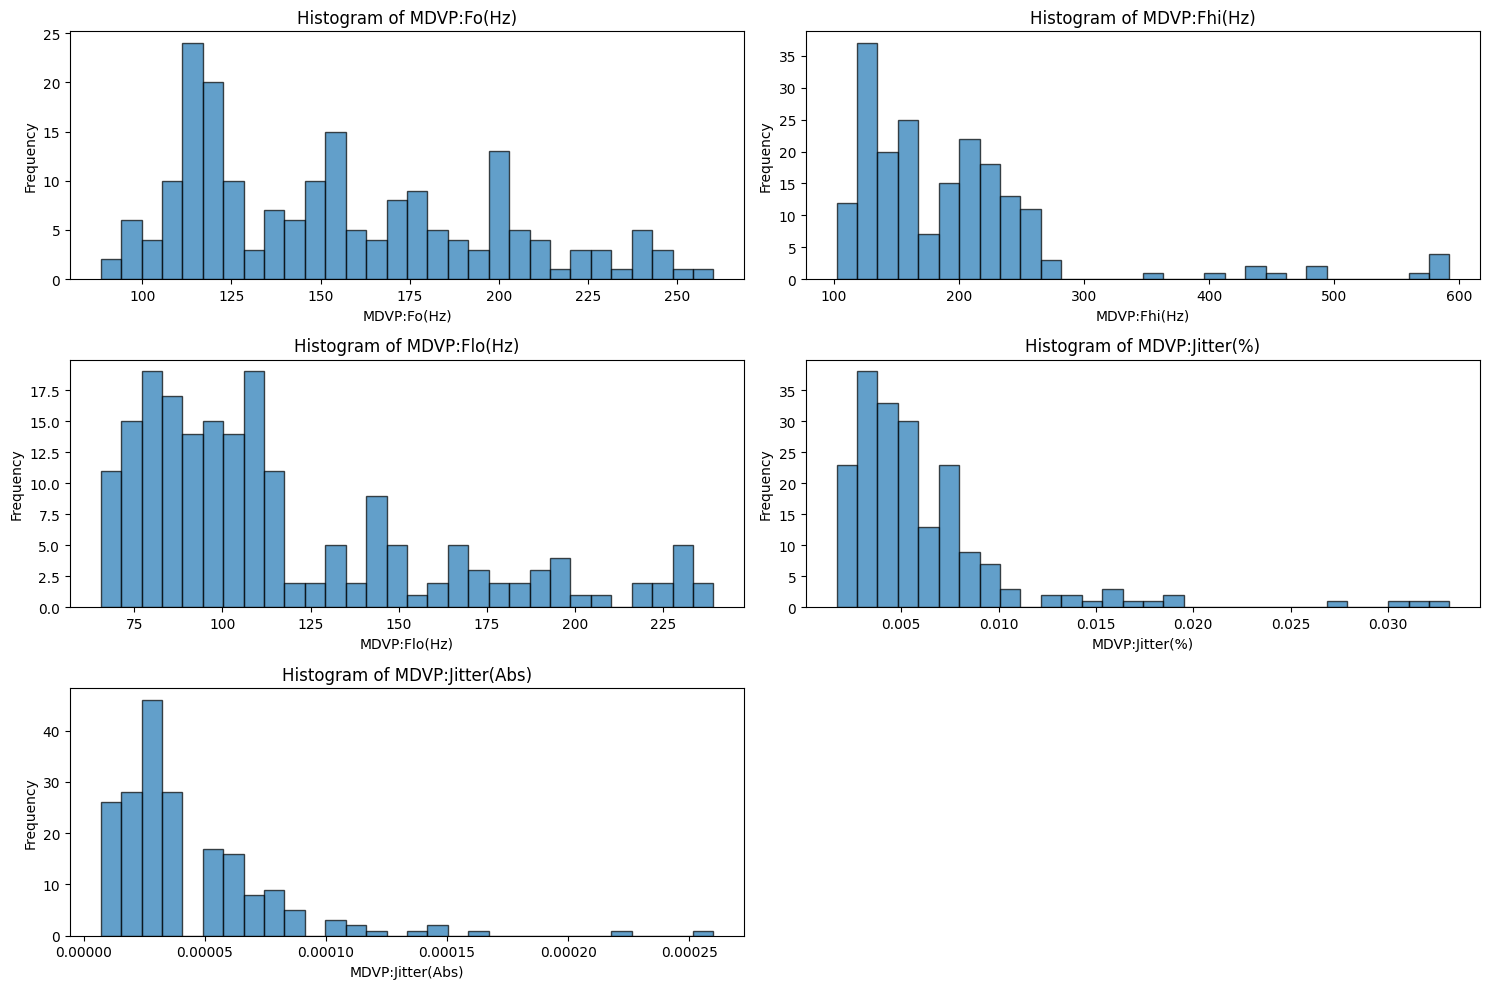

In [104]:
first_5_attributes = data_X.columns[:5]

plt.figure(figsize=(15, 10))
for i, attribute in enumerate(first_5_attributes, 1):
    plt.subplot(3, 2, i)
    plt.hist(data_X[attribute], bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {attribute}')

plt.tight_layout()
plt.show()

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [105]:
def split_data(data_X, data_Y, test_percent=20, random_state=5):
    train_X, test_X, train_Y, test_Y = train_test_split(
        data_X, data_Y, test_size=test_percent/100, random_state=random_state
    )
    return train_X, train_Y, test_X, test_Y

(train_X, train_Y, test_X, test_Y) = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(train_data_X, train_data_Y)
    
    predictions = knn.predict(test_data_X)
    
    accuracy = accuracy_score(test_data_Y, predictions)
    
    return accuracy

accuracy = get_classification_accuracy(train_X, train_Y, test_X, test_Y, k=3)
print(f"Classification accuracy: {accuracy}")

Classification accuracy: 0.7692307692307693


#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [107]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

def standarize_train_and_test(train_X, test_X, scaler_type='standard'):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'maxabs':
        scaler = MaxAbsScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose 'standard', 'minmax', or 'maxabs'.")
    
    # Fit the scaler on the training data and transform both train and test data
    norm_train_X = scaler.fit_transform(train_X)
    norm_test_X = scaler.transform(test_X)
    
    return pd.DataFrame(norm_train_X, columns=train_X.columns), pd.DataFrame(norm_test_X, columns=test_X.columns)

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, scaler_type='standard')
accuracy_standard = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)
print(f"Classification accuracy with StandardScaler: {accuracy_standard}")

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, scaler_type='minmax')
accuracy_minmax = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)
print(f"Classification accuracy with MinMaxScaler: {accuracy_minmax}")

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, scaler_type='maxabs')
accuracy_maxabs = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)
print(f"Classification accuracy with MaxAbsScaler: {accuracy_maxabs}")

Classification accuracy with StandardScaler: 0.9743589743589743
Classification accuracy with MinMaxScaler: 0.9743589743589743
Classification accuracy with MaxAbsScaler: 0.9743589743589743


# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

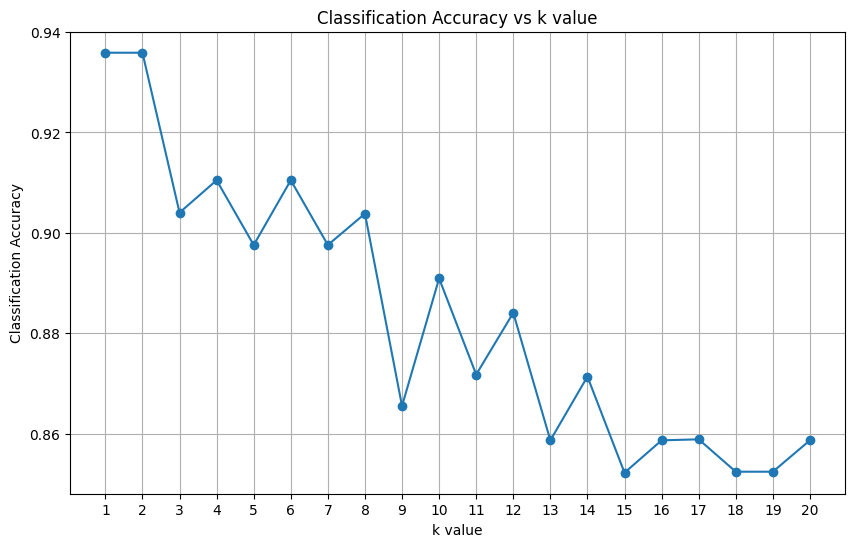

The best k value is: 1


In [108]:
import numpy as np
from sklearn.model_selection import cross_val_score

def find_best_k(train_X, train_Y, k_range=20):
    accuracies = []
    k_values = range(1, k_range + 1)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        cv_scores = cross_val_score(knn, train_X, train_Y, cv=5, scoring='accuracy')
        accuracies.append(np.mean(cv_scores))
    
    return k_values, accuracies

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, scaler_type='standard')
k_values, accuracies = find_best_k(norm_train_X, train_Y, k_range=20)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs k value')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"The best k value is: {best_k}")

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [109]:
best_k = k_values[np.argmax(accuracies)]

final_accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=best_k)
print(f"Final classification accuracy with k={best_k}: {final_accuracy}")


Final classification accuracy with k=1: 0.9743589743589743


# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    
    

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv")

data_X = data.drop(columns=['quality'])
data_Y = data['quality']

train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=5, stratify=data_Y)

scaler = StandardScaler()
norm_train_X = scaler.fit_transform(train_X)
norm_test_X = scaler.transform(test_X)





In [111]:
def find_best_k(train_X, train_Y, k_range=20):
    accuracies = []
    k_values = range(1, k_range + 1)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        cv_scores = cross_val_score(knn, train_X, train_Y, cv=5, scoring='accuracy')
        accuracies.append(np.mean(cv_scores))
    
    return k_values, accuracies

k_values, accuracies = find_best_k(norm_train_X, train_Y, k_range=20)


Chart describing accuracy from k

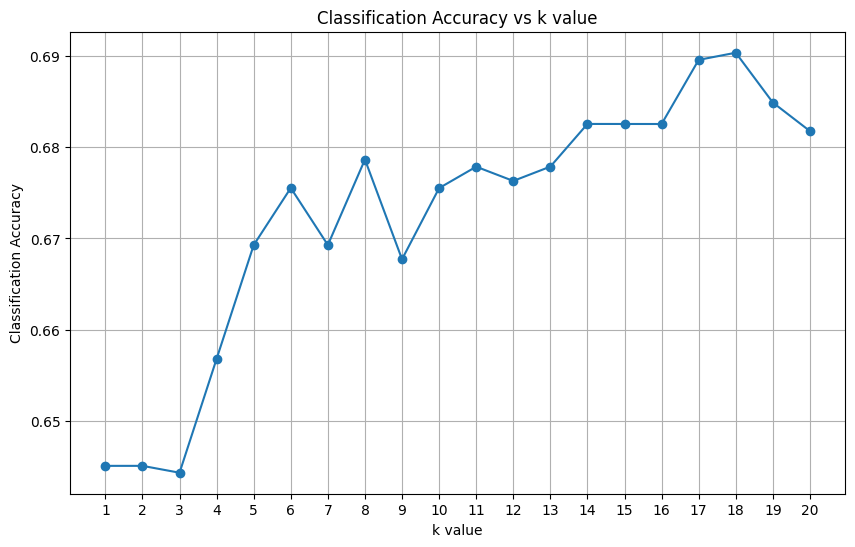

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs k value')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Find best K

In [113]:
best_k = k_values[np.argmax(accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 18


Computing accuracy using best K

In [114]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(norm_train_X, train_Y)
predictions = knn.predict(norm_test_X)
final_accuracy = accuracy_score(test_Y, predictions)
print(f"Final classification accuracy with k={best_k}: {final_accuracy}")

Final classification accuracy with k=18: 0.61875


Printing confusion matrix and classification report

In [115]:
conf_matrix = confusion_matrix(test_Y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(test_Y, predictions)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 18  20   5]
 [ 14  70  44]
 [  4  35 110]]
Classification Report:
              precision    recall  f1-score   support

        good       0.50      0.42      0.46        43
      medium       0.56      0.55      0.55       128
        poor       0.69      0.74      0.71       149

    accuracy                           0.62       320
   macro avg       0.58      0.57      0.57       320
weighted avg       0.61      0.62      0.62       320

